In [ ]:
# pip install transformers==3.0.2 sentence_transformers==0.3.3

# use below code to check for the correct version of transformers and sentence_transformers
# otherwise, the model encoder won't be compatiblwith newer versions of those packages
# import transformers
# print( transformers.__version__)

# import sentence_transformers
# print(sentence_transformers.__version__)

In [6]:
pip install transformers==3.0.2 sentence_transformers==0.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 769 kB 8.2 MB/s 
     |████████████████████████████████| 65 kB 2.1 MB/s 
     |████████████████████████████████| 3.0 MB 42.1 MB/s 
     |████████████████████████████████| 880 kB 58.6 MB/s 
     |████████████████████████████████| 1.3 MB 62.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.3-py3-none-any.whl size=97302 sha256=987ebbef0fae1892be488b70bfd85fbb757973b47c88275836aad8fd5980ed65
  Stored in directory: /root/.cache/pip/wheels/9e/03/96/a32af02b51743e0f3812c48cfc6d37ee8a6eaf6706b6014876
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=b14d8837eeccc0e31c6abb12c37577cea12064ee152e2710295faf58176f904e
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sentence-transformers sacremoses


In [7]:
import re
import json
import pickle
import numpy as np
import pandas as pd

import torch 
from torch import nn
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd /content/drive/MyDrive/Assignments/capstone/

/content/drive/MyDrive/Assignments/capstone


In [10]:
ls

 2017_headline_results.csv         pntm.ipynb
 FINAL_semeval2010t8_train.csv    'pooled_context_para_triples_p=0.8'/
 phrase_bert_similarity.ipynb      semeval2010t8_test.csv
 phrase-bert-topic-model-master/   semeval2010t8_train.csv
 pntm/


In [ ]:
semeval = pd.read_csv('FINAL_semeval2010t8_train.csv')
semeval_train = pd.read_csv('semeval2010t8_train.csv')
semeval_test = pd.read_csv('semeval2010t8_train.csv')
semeval_label = pd.concat([semeval_train, semeval_test])
headline = pd.read_csv('2017_headline_results.csv')

In [ ]:
semeval_label.head(5)

,corpus,doc_id,sent_id,eg_id,index,text,text_w_pairs,seq_label,pair_label,context,num_sents
0,semeval2010t8,train.json,0,0,semeval2010t8_train.json_0_0,The system as described above has its greatest...,The system as described above has its greatest...,0,0,NaN,1
1,semeval2010t8,train.json,1,0,semeval2010t8_train.json_1_0,The child was carefully wrapped and bound into...,The <ARG1>child</ARG1> was carefully wrapped a...,0,0,NaN,1
2,semeval2010t8,train.json,2,0,semeval2010t8_train.json_2_0,The author of a keygen uses a disassembler to ...,The <ARG1>author</ARG1> of a keygen uses a <AR...,0,0,NaN,1
3,semeval2010t8,train.json,3,0,semeval2010t8_train.json_3_0,A misty ridge uprises from the surge .,A misty <ARG1>ridge</ARG1> uprises from the <A...,0,0,NaN,1
4,semeval2010t8,train.json,4,0,semeval2010t8_train.json_4_0,The student association is the voice of the un...,The <ARG0>student</ARG0> <ARG1>association</AR...,0,0,NaN,1


In [ ]:
semeval.head(5)

,corpus,doc_id,sent_id,eg_id,index,text,text_w_pairs,seq_label,pair_label,context,num_sents
0,semeval2010t8,train.json,3,0,semeval2010t8_train.json_3_0,A misty ridge uprises from the surge .,<ARG1> A misty ridge uprises from the </ARG1> ...,1,0,NaN,1
1,semeval2010t8,train.json,6,0,semeval2010t8_train.json_6_0,The current view is that the chronic inflammat...,The current view is <ARG1> that the chronic in...,1,1,NaN,1
2,semeval2010t8,train.json,13,0,semeval2010t8_train.json_13_0,The burst has been caused by water hammer pres...,<ARG1> The burst has been </ARG1> caused by <A...,1,1,NaN,1
3,semeval2010t8,train.json,22,0,semeval2010t8_train.json_22_0,"The singer , who performed three of the nomina...","<ARG0> The singer , who performed three of the...",1,1,NaN,1
4,semeval2010t8,train.json,26,0,semeval2010t8_train.json_26_0,Suicide is one of the leading causes of death ...,<ARG0> Suicide is one of the leading causes of...,1,1,NaN,1


In [ ]:
headline.head(5)

,corpus,doc_id,sent_id,eg_id,index,text,text_w_pairs,seq_label,pair_label,context,num_sents
0,polusa,/home/vv2116/capstone_data/2017_1.csv,115892789,0,115892789,obama boosted white house technology; trump se...,obama boosted white house technology; <ARG1> t...,1,0,NaN,2
1,polusa,/home/vv2116/capstone_data/2017_1.csv,4501005,0,4501005,gun-shaped cell phone case prompts police stan...,<ARG0> gun-shaped cell phone case </ARG0> prom...,1,1,NaN,2
2,polusa,/home/vv2116/capstone_data/2017_1.csv,59608821,0,59608821,23 dead after ferry carrying new year's revele...,"<ARG1> 23 dead after ferry carrying new ""year'...",1,1,NaN,2
3,polusa,/home/vv2116/capstone_data/2017_1.csv,59542836,0,59542836,car chase leads to 2017's first officer-involv...,"<ARG0> car chase </ARG0> leads to <ARG1> ""2017...",1,1,NaN,2
4,polusa,/home/vv2116/capstone_data/2017_1.csv,52947165,0,52947165,cybersecurity expert on russian sanctions with...,<ARG1> cybersecurity expert </ARG1> on russian...,1,0,NaN,2


In [ ]:
# filter the dataframe by pair_label for only causal texts
semeval_label_causal = semeval_label[semeval_label['pair_label'] == 1] 
semeval_causal = semeval[semeval['pair_label'] == 1] 
headline_causal = headline[headline['pair_label'] == 1] 
len(semeval_label_causal), len(semeval_label)

(2006, 16000)

In [ ]:
semeval_textwpairs = semeval_causal['text_w_pairs']
headline_textwpairs = headline_causal['text_w_pairs']
semeval_label_textwpairs = semeval_label_causal['text_w_pairs']

In [ ]:
semeval_textwpairs.head(5)

1    The current view is <ARG1> that the chronic in...
2    <ARG1> The burst has been </ARG1> caused by <A...
3    <ARG0> The singer , who performed three of the...
4    <ARG0> Suicide is one of the leading causes of...
5    <ARG1> He had chest pains and headaches from <...
Name: text_w_pairs, dtype: object

In [ ]:
headline_textwpairs.head(5)

1     <ARG0> gun-shaped cell phone case </ARG0> prom...
2     <ARG1> 23 dead after ferry carrying new "year'...
3     <ARG0> car chase </ARG0> leads to <ARG1> "2017...
9     <ARG1> scenes of chaos and </ARG1> mourning af...
11    officials: delaware man injured in istanbul ni...
Name: text_w_pairs, dtype: object

In [ ]:
def extract_args(dataset):
    arg0s = []
    arg1s = []
    for textwpair in dataset:
        arg0 = re.findall(r"<ARG0>(.*?)</ARG0>", textwpair) # list of all argument0s in string textwpair
        arg1 = re.findall(r"<ARG1>(.*?)</ARG1>", textwpair) # list of all argument1s in string textwpair
        if len(arg0) != 0:
            # unpack the list of argument0s and append them one by one
            for arg in arg0:
                arg0s.append(arg)
        if len(arg1) != 0:
            # unpack the list of argument1s and append them one by one
            for arg in arg1:
                arg1s.append(arg)
    return arg0s, arg1s

In [ ]:
# list of arg0s and arg1s for SemEval
semeval_arg0s, semeval_arg1s = extract_args(semeval_textwpairs)
# list of all args for SemEval
semeval_args = semeval_arg0s + semeval_arg1s

In [ ]:
# list of arg0s and arg1s for POLUSA headlines
headline_arg0s, headline_arg1s = extract_args(headline_textwpairs)
# list of all args for POLUSA headlines
headline_args = headline_arg0s + headline_arg1s

In [ ]:
# list of arg0s and arg1s for SemEval labels
semeval_label_arg0s, semeval_label_arg1s = extract_args(semeval_label_textwpairs)
# list of all args for SemEval labels
semeval_label_args = semeval_label_arg0s + semeval_label_arg1s
len(semeval_label_args)

4012

In [ ]:
len(headline_args), len(semeval_args)

(23785, 3003)

In [ ]:
# load the Phrase-BERT model through the sentence-BERT interface
model_path = "/content/drive/MyDrive/Assignments/capstone/pooled_context_para_triples_p=0.8/"
model = SentenceTransformer(model_path)

In [ ]:
# compute phrase embeddings using Phrase-BERT
semeval_label_embs = model.encode(semeval_label_args)
semeval_phrase_embs = model.encode(semeval_args)
headline_phrase_embs = model.encode(headline_args)
semeval_phrase_embs

array([[-0.23965901,  0.57680434, -1.2074676 , ...,  0.19030233,
        -0.900968  ,  0.6268627 ],
       [-0.8924905 , -0.2442526 , -0.37075078, ...,  0.26867354,
        -0.74091333,  0.15561208],
       [-0.44271705,  0.17494543,  0.01883868, ..., -0.17644162,
        -1.4606496 , -0.03986926],
       ...,
       [-0.7302847 , -0.14900614,  0.8359608 , ..., -0.13624333,
        -0.25024042,  0.7136981 ],
       [ 0.20158978,  1.1561679 ,  0.04025006, ...,  0.12761411,
        -0.13201101, -0.28014234],
       [-0.58174527, -0.28931105,  0.36161232, ..., -0.275353  ,
        -1.0146208 ,  0.24247041]], dtype=float32)

In [ ]:
# create the subsets here
semeval_args_subset = semeval_args[100:115] # size of 15
semeval_phrase_embs_subset = semeval_phrase_embs[100:115] # size of 15
headline_args_subset = headline_args[100:115] # size of 15
headline_phrase_embs_subset = headline_phrase_embs[100:115] # size of 15
semeval_label_args_subset = semeval_label_args[100:115]
semeval_label_embs_subset = semeval_label_embs[100:115]
semeval_label_args_subset

['sinking',
 'pain killers',
 'bacteria',
 'spray',
 'hormone',
 'waste',
 'problems',
 'advertisements',
 'battle',
 'dams',
 'laser',
 'resignation',
 'speculation',
 'drill',
 'earthquakes']

In [ ]:
# function to create a similarity matrix given args and embeddings
def sim_matrix(args_subset, embs_subset):
    similarity_matrix = cosine_similarity(embs_subset)
    # turn the similarity matrix into a pandas dataframe
    similarity_matrix_df = pd.DataFrame(similarity_matrix, index = args_subset, columns = args_subset)
    return similarity_matrix_df

In [ ]:
semeval_sub_sim_df = sim_matrix(semeval_args_subset, semeval_phrase_embs_subset)
headline_sub_sim_df = sim_matrix(headline_args_subset, headline_phrase_embs_subset)
semeval_label_sub_sim_df = sim_matrix(semeval_label_args_subset, semeval_label_embs_subset)
semeval_sim_df = sim_matrix(semeval_args, semeval_phrase_embs)
headline_sim_df = sim_matrix(headline_args, headline_phrase_embs)
semeval_label_sim_df = sim_matrix(semeval_label_args, semeval_label_embs)

In [ ]:
semeval_label_sim_df.shape

(4012, 4012)

In [ ]:
# save similarity matrix as csv
semeval_sim_df.to_csv('/content/drive/MyDrive/Assignments/capstone/semeval_sim_matrix.csv')
headline_sim_df.to_csv('/content/drive/MyDrive/Assignments/capstone/headline_sim_matrix.csv')
semeval_label_sim_df.to_csv('/content/drive/MyDrive/Assignments/capstone/semeval_label_sim_matrix.csv')

In [ ]:
semeval_label_sim_df.head(5)

,infection,pressure,singer,Suicide,mold,stress,women,skin abnormality,comet,bomb explosion,...,light,optimism,growth,light,worsening,dryness,discomfort,signal,anxiety,inversion
infection,1.000000,0.510961,0.330203,0.638692,0.554287,0.653246,0.438653,0.799745,0.427250,0.537526,...,0.352085,0.432427,0.545922,0.352085,0.740141,0.618753,0.611488,0.443013,0.618733,0.549491
pressure,0.510961,1.000000,0.362819,0.524576,0.552879,0.753377,0.384015,0.514751,0.419689,0.528558,...,0.534012,0.513491,0.590166,0.534012,0.586291,0.658184,0.631412,0.525076,0.651883,0.596031
singer,0.330203,0.362819,1.000000,0.486313,0.388011,0.415278,0.537213,0.439296,0.465978,0.377327,...,0.413690,0.416902,0.274310,0.413690,0.341521,0.413239,0.464723,0.494097,0.460890,0.438658
Suicide,0.638692,0.524576,0.486313,1.000000,0.534760,0.682031,0.573621,0.586500,0.493835,0.689252,...,0.418560,0.602936,0.549357,0.418560,0.623067,0.559162,0.613728,0.404325,0.687443,0.588986
mold,0.554287,0.552879,0.388011,0.534760,1.000000,0.533842,0.453556,0.544901,0.490121,0.582905,...,0.576268,0.423442,0.470405,0.576268,0.548306,0.664048,0.517213,0.474402,0.467715,0.569552


In [ ]:
semeval_sim_df.head(5)

,Helicobacter pylori infection,increased acid production from the non-infected upper corpus region,water hammer pressure .,"The singer , who performed three of the nominated songs ,",also,Suicide is one of the leading causes of death among pre-adolescents and teens,mold in the bedrooms,Financial stress is one of the main,improperly fitting shoes or,a skin abnormality .,...,"the underground/indie rock scene that would one day be called ""'"" alternative music ""'"" .",Hand creams counteract dryness,Eye discomfort from this staring effect is exacerbated,to,crea .,Parents also experience anxiety,and worry about an uncertain outcome .,In,lasers,the inversion
Helicobacter pylori infection,1.000000,0.766394,0.520665,0.143966,0.407116,0.625207,0.460608,0.454257,0.478356,0.760644,...,0.289399,0.599362,0.554260,0.388560,0.600343,0.516385,0.418414,0.331088,0.441641,0.449626
increased acid production from the non-infected upper corpus region,0.766394,1.000000,0.589502,0.136142,0.483452,0.534411,0.405019,0.435647,0.460351,0.652875,...,0.312566,0.647067,0.573478,0.362213,0.490322,0.470899,0.358271,0.357502,0.358418,0.472252
water hammer pressure .,0.520665,0.589502,1.000000,0.069299,0.386066,0.311341,0.465594,0.475166,0.513796,0.508411,...,0.229421,0.702176,0.452080,0.438175,0.424220,0.304732,0.354097,0.342586,0.485043,0.541192
"The singer , who performed three of the nominated songs ,",0.143966,0.136142,0.069299,1.000000,0.267891,0.207575,0.078293,0.106566,0.171083,0.144411,...,0.291021,0.095524,0.199341,0.205981,0.128030,0.221209,0.153719,0.165840,0.177519,0.134696
also,0.407116,0.483452,0.386066,0.267891,1.000000,0.367497,0.371409,0.357237,0.510862,0.506479,...,0.363182,0.464392,0.466045,0.658592,0.467107,0.517491,0.453066,0.625746,0.369294,0.512988


In [ ]:
headline_sim_df.head(5)

,gun-shaped cell phone case,car chase,istanbul nightclub attack,trump,the moderate insurgency:,defeat,good health is born of a good society.,cease-fire wavers,istanbul attack overshadows new year festivities,be better americans than the incoming president,...,climate,white house:,chicago crime,a seat at the table:,state dept.,restores job offers to students,cowardice,council leader quits,microsoft,damage limited
gun-shaped cell phone case,1.000000,0.563391,0.533141,0.421654,0.443261,0.385704,0.268374,0.485885,0.359716,0.227868,...,0.284576,0.412577,0.422453,0.516935,0.415546,0.240067,0.407771,0.295768,0.420670,0.385007
car chase,0.563391,1.000000,0.546270,0.441447,0.435919,0.462768,0.244395,0.506144,0.377683,0.212453,...,0.383065,0.304628,0.492685,0.433124,0.366037,0.259551,0.508334,0.353341,0.401374,0.338736
istanbul nightclub attack,0.533141,0.546270,1.000000,0.493790,0.486713,0.387415,0.317926,0.461506,0.696056,0.251334,...,0.319881,0.430898,0.575388,0.383961,0.397671,0.202486,0.482187,0.412511,0.360744,0.334579
trump,0.421654,0.441447,0.493790,1.000000,0.438801,0.509697,0.302103,0.409488,0.390994,0.476485,...,0.313301,0.599314,0.471506,0.445283,0.419183,0.225968,0.520528,0.485926,0.498661,0.240591
the moderate insurgency:,0.443261,0.435919,0.486713,0.438801,1.000000,0.529710,0.456460,0.509386,0.449082,0.414778,...,0.385700,0.480918,0.442937,0.368973,0.493108,0.327105,0.561202,0.444660,0.327570,0.432932


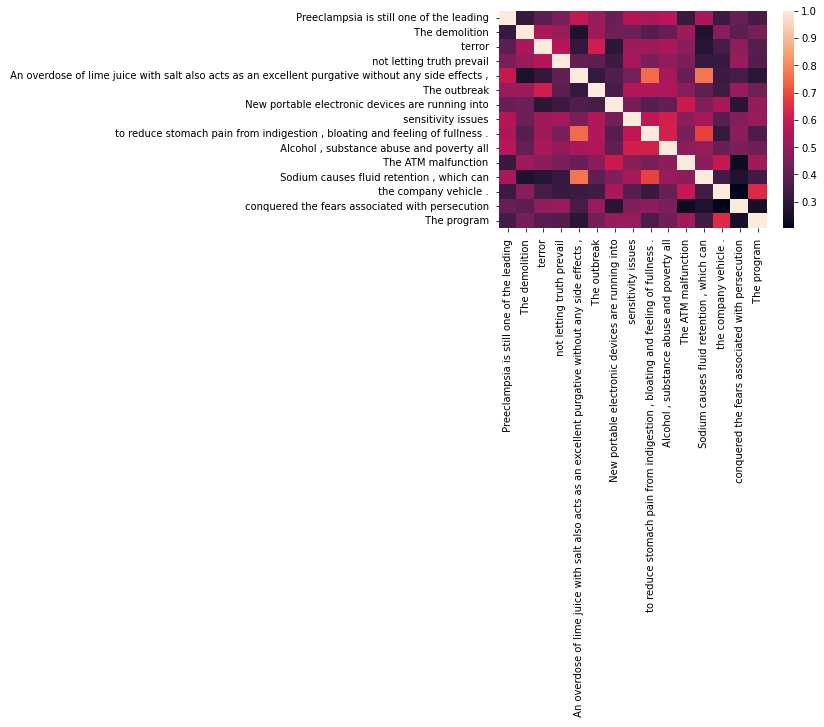

In [ ]:
sns.heatmap(semeval_sub_sim_df)

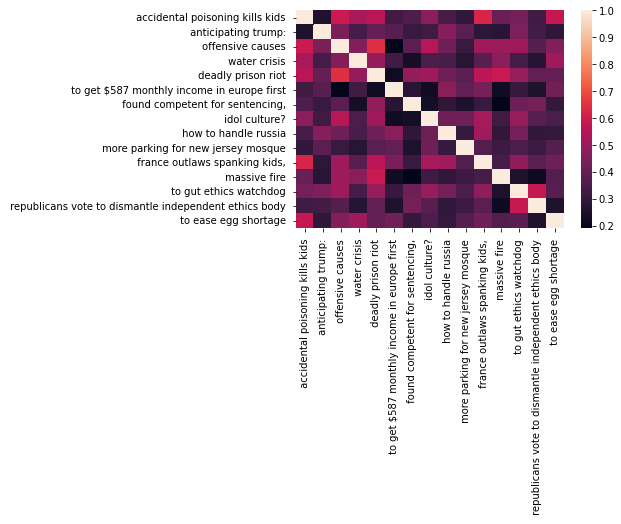

In [ ]:
sns.heatmap(headline_sub_sim_df)

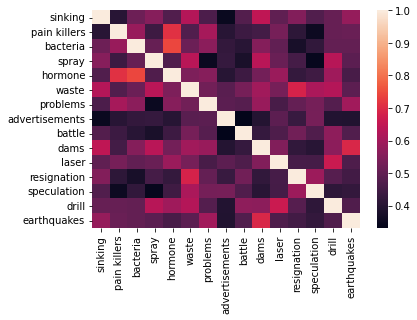

In [ ]:
sns.heatmap(semeval_label_sub_sim_df)

In [ ]:
# use only the upper triangle of the similarity matrix to find the max
semeval_sim_arr_upper = np.triu(semeval_sim_df, 1)
semeval_sim_df_upper = pd.DataFrame(semeval_sim_arr_upper, index = semeval_args, columns = semeval_args)
semeval_sim_df_upper.head(5)

,Helicobacter pylori infection,increased acid production from the non-infected upper corpus region,water hammer pressure .,"The singer , who performed three of the nominated songs ,",also,Suicide is one of the leading causes of death among pre-adolescents and teens,mold in the bedrooms,Financial stress is one of the main,improperly fitting shoes or,a skin abnormality .,...,"the underground/indie rock scene that would one day be called ""'"" alternative music ""'"" .",Hand creams counteract dryness,Eye discomfort from this staring effect is exacerbated,to,crea .,Parents also experience anxiety,and worry about an uncertain outcome .,In,lasers,the inversion
Helicobacter pylori infection,0.0,0.766394,0.520665,0.143966,0.407116,0.625207,0.460608,0.454257,0.478356,0.760644,...,0.289399,0.599362,0.554260,0.388560,0.600343,0.516385,0.418414,0.331088,0.441641,0.449626
increased acid production from the non-infected upper corpus region,0.0,0.000000,0.589502,0.136142,0.483452,0.534410,0.405019,0.435647,0.460352,0.652875,...,0.312566,0.647067,0.573478,0.362213,0.490322,0.470899,0.358271,0.357502,0.358418,0.472252
water hammer pressure .,0.0,0.000000,0.000000,0.069299,0.386066,0.311341,0.465594,0.475166,0.513796,0.508411,...,0.229421,0.702176,0.452081,0.438175,0.424221,0.304732,0.354097,0.342586,0.485043,0.541192
"The singer , who performed three of the nominated songs ,",0.0,0.000000,0.000000,0.000000,0.267891,0.207575,0.078293,0.106566,0.171083,0.144411,...,0.291021,0.095524,0.199341,0.205981,0.128030,0.221209,0.153719,0.165840,0.177519,0.134696
also,0.0,0.000000,0.000000,0.000000,0.000000,0.367496,0.371409,0.357237,0.510863,0.506479,...,0.363182,0.464392,0.466045,0.658592,0.467107,0.517491,0.453066,0.625746,0.369294,0.512987


In [ ]:
headline_sim_arr_upper = np.triu(headline_sim_df, 1)
headline_sim_df_upper = pd.DataFrame(headline_sim_arr_upper, index = headline_args, columns = headline_args)
headline_sim_df_upper.head(5)

,gun-shaped cell phone case,car chase,istanbul nightclub attack,trump,the moderate insurgency:,defeat,good health is born of a good society.,cease-fire wavers,istanbul attack overshadows new year festivities,be better americans than the incoming president,...,climate,white house:,chicago crime,a seat at the table:,state dept.,restores job offers to students,cowardice,council leader quits,microsoft,damage limited
gun-shaped cell phone case,0.0,0.563391,0.533141,0.421654,0.443261,0.385704,0.268374,0.485885,0.359716,0.227868,...,0.284576,0.412577,0.422453,0.516935,0.415546,0.240067,0.407771,0.295768,0.420670,0.385007
car chase,0.0,0.000000,0.546270,0.441447,0.435919,0.462767,0.244395,0.506144,0.377683,0.212453,...,0.383065,0.304628,0.492686,0.433124,0.366037,0.259551,0.508334,0.353342,0.401374,0.338736
istanbul nightclub attack,0.0,0.000000,0.000000,0.493790,0.486712,0.387415,0.317926,0.461506,0.696056,0.251334,...,0.319881,0.430898,0.575388,0.383961,0.397671,0.202486,0.482187,0.412511,0.360744,0.334579
trump,0.0,0.000000,0.000000,0.000000,0.438802,0.509697,0.302103,0.409488,0.390994,0.476485,...,0.313301,0.599314,0.471506,0.445283,0.419183,0.225968,0.520528,0.485926,0.498661,0.240591
the moderate insurgency:,0.0,0.000000,0.000000,0.000000,0.000000,0.529710,0.456460,0.509386,0.449082,0.414778,...,0.385700,0.480919,0.442937,0.368973,0.493108,0.327105,0.561202,0.444660,0.327570,0.432932


In [ ]:
semeval_label_sim_arr_upper = np.triu(semeval_label_sim_df, 1)
semeval_label_sim_df_upper = pd.DataFrame(semeval_label_sim_arr_upper, index = semeval_label_args, columns = semeval_label_args)
semeval_label_sim_df_upper.head(5)

,infection,pressure,singer,Suicide,mold,stress,women,skin abnormality,comet,bomb explosion,...,light,optimism,growth,light,worsening,dryness,discomfort,signal,anxiety,inversion
infection,0.0,0.510961,0.330203,0.638692,0.554287,0.653246,0.438653,0.799745,0.427250,0.537526,...,0.352085,0.432427,0.545922,0.352085,0.740141,0.618753,0.611488,0.443013,0.618733,0.549491
pressure,0.0,0.000000,0.362819,0.524576,0.552879,0.753377,0.384015,0.514751,0.419689,0.528558,...,0.534012,0.513491,0.590166,0.534012,0.586291,0.658184,0.631413,0.525077,0.651883,0.596031
singer,0.0,0.000000,0.000000,0.486313,0.388011,0.415278,0.537213,0.439296,0.465978,0.377327,...,0.413690,0.416902,0.274310,0.413690,0.341521,0.413239,0.464723,0.494097,0.460890,0.438658
Suicide,0.0,0.000000,0.000000,0.000000,0.534760,0.682031,0.573621,0.586500,0.493836,0.689251,...,0.418560,0.602936,0.549357,0.418560,0.623067,0.559162,0.613728,0.404325,0.687443,0.588986
mold,0.0,0.000000,0.000000,0.000000,0.000000,0.533842,0.453556,0.544901,0.490122,0.582905,...,0.576268,0.423443,0.470405,0.576268,0.548306,0.664048,0.517213,0.474402,0.467715,0.569553


In [ ]:
# find the max for each row
semeval_label_max_row = semeval_label_sim_df_upper.max(axis = 1)
semeval_label_max_rowname = semeval_label_sim_df_upper.idxmax(axis = 1)
# find the max for each column
semeval_label_max_col = semeval_label_sim_df_upper.max(axis = 0)
semeval_label_max_colname = semeval_label_sim_df_upper.idxmax(axis = 0)

In [ ]:
semeval_label_max_rowname[600:630]

recession              recession
hurricanes            hurricanes
air                          air
germs                      germs
drought                  drought
acne breakouts    acne breakouts
suffocation          suffocation
purchase                purchase
debt                        debt
plate                      plate
tsunami                  tsunami
epidemic                epidemic
waterjet                waterjet
threats                  threats
tremors                  tremors
machine                  machine
steam                      steam
death                      death
Exposure                exposure
celebs                    celebs
chopsticks            chopsticks
unemployment        unemployment
discussion            discussion
poisoning              poisoning
success                  success
exhaustion            exhaustion
hinge                      hinge
radiation              radiation
worms                      worms
rains                      rains
dtype: obj

In [ ]:
semeval_label_max_row.loc["violence"]

violence    1.000000
violence    1.000000
violence    1.000000
violence    1.000000
violence    1.000000
violence    0.822982
dtype: float32

In [ ]:
# find the max for each row
semeval_max_row = semeval_sim_df_upper.max(axis = 1)
semeval_max_rowname = semeval_sim_df_upper.idxmax(axis = 1)
# find the max for each column
semeval_max_col = semeval_sim_df_upper.max(axis = 0)
semeval_max_colname = semeval_sim_df_upper.idxmax(axis = 0)

In [ ]:
semeval_max_rowname[100:130]

 Preeclampsia is still one of the leading                                                                              Atopic dermatitis , the most common type of e...
 The demolition                                                                                                                                        The destruction 
 terror                                                                                                                                                         terror 
 not letting truth prevail                                                                                                  not respecting the interests of the people 
 An overdose of lime juice with salt also acts as an excellent purgative without any side effects ,                    colas and drinks with nutrasweet (aspartame) ...
 The outbreak                                                                                                                                         Outbreaks 

In [ ]:
semeval_max_rowname.loc[" combination of human resources and institutions "]

' constraints and resources brought to bear simultaneously by agent personality , structures of daily life , and macro social structures . '

In [ ]:
semeval_sim_df_upper.loc["surge","a violent eruption ."]

0.7575629

In [ ]:
# find the max for each row
headline_max_row = headline_sim_df_upper.max(axis = 1)
headline_max_rowname = headline_sim_df_upper.idxmax(axis = 1)
# find the max for each column
headline_max_col = headline_sim_df_upper.max(axis = 0)
headline_max_colname = headline_sim_df_upper.idxmax(axis = 0)

In [ ]:
headline_max_rowname[30:70]

 van, truck collide,                                                                                 van, truck collide, 
 catch fire on thai highway,                                                                 catch fire on thai highway, 
 failure                                                                                                         failure 
 van, truck collide,                                                                                      van collision, 
 catch fire on thai highway,                                             suicide car bomb explodes outside somalia res...
 rises kick in                                                                                                 heightens 
 shrouded by health alerts and travel chaos                                                misery, deaths, travel delays 
 indonesia ferry fire kills 23                                                                     tanker fire kills 146 
 demand for subsidised p

In [ ]:
headline_max_row.loc[" to stop a right-wing hijacking of the judiciary "]

0.7984942

## Topic Modeling using PNTM

In [12]:
cd /content/drive/MyDrive/Assignments/capstone/phrase-bert-topic-model-master/phrase-topic-model/

/content/drive/MyDrive/Assignments/capstone/phrase-bert-topic-model-master/phrase-topic-model


In [2]:
"""!wget https://storage.googleapis.com/phrase-bert/topic-model/text_list.json
!wget https://storage.googleapis.com/phrase-bert/topic-model/text_rep.pkl
!wget https://storage.googleapis.com/phrase-bert/topic-model/combined_word2id_dict.pkl
!wget https://storage.googleapis.com/phrase-bert/topic-model/combined_id2word_dict.pkl
!wget https://storage.googleapis.com/phrase-bert/topic-model/id2freq_dict.pkl"""

'!wget https://storage.googleapis.com/phrase-bert/topic-model/text_list.json\n!wget https://storage.googleapis.com/phrase-bert/topic-model/text_rep.pkl\n!wget https://storage.googleapis.com/phrase-bert/topic-model/combined_word2id_dict.pkl\n!wget https://storage.googleapis.com/phrase-bert/topic-model/combined_id2word_dict.pkl\n!wget https://storage.googleapis.com/phrase-bert/topic-model/id2freq_dict.pkl'

In [3]:
!python -u preprocess.py --topic_model_data_path \
"/content/drive/MyDrive/Assignments/capstone/phrase-bert-topic-model-master/phrase-topic-model/" \
--emb_model_path "/content/drive/MyDrive/Assignments/capstone/pooled_context_para_triples_p=0.8/"

python3: can't open file 'preprocess.py': [Errno 2] No such file or directory


In [4]:
!python -u run_topic_model.py \
        --num_topics 100 \
        --num_epochs 300 \
        --random_seed 42 \
        --topic_model_data_path "/content/drive/MyDrive/Assignments/capstone/phrase-bert-topic-model-master/phrase-topic-model/" \
        --emb_model phrase-bert

python3: can't open file 'run_topic_model.py': [Errno 2] No such file or directory


In [13]:
with open('combined_word2id_dict.pkl', 'rb' ) as f:
    word2id_dict = pickle.load(f) # a dictionary with phrases as keys and ids as values

In [14]:
with open('combined_id2word_dict.pkl', 'rb' ) as f:
    id2word_dict = pickle.load(f) # a dictionary with ids as keys and phrases as values

In [42]:
with open('id2freq_dict.pkl', 'rb' ) as f:
    id2freq_dict = pickle.load(f)

In [15]:
with open('text_list.json', 'r') as f:
    text_list = json.load(f) # a list of strings of texts / articles

In [44]:
example = {"a": 2, "a": 3, "e": 4}
lst = ["1", "a", "a", "3", "hahah"]
example

{'a': 3, 'e': 4}

In [46]:
i = 0
for key, val in example.items():
    example[key] = lst[i]
    i += 1
example

{'a': '1', 'e': 'a'}

In [26]:
temp = {val : idx + 1 for idx, val in enumerate(set(lst))}
temp

{'3': 1, 'a': 2, 'hahah': 3, '1': 4}

In [27]:
inv_map = {v: k for k, v in temp.items()}
inv_map

{1: '3', 2: 'a', 3: 'hahah', 4: '1'}

In [28]:
text_list[0]

"  \n  Chinese scholars and officials traditionally considered scientific and engineering pursuits to be the domain of artisans and craftsmen ( <unk> <unk> ) , far beneath the ideal Confucian literary gentleman . Accordingly , evidence of Han @-@ era mechanical engineering comes largely from the choice observational writings of sometimes disinterested Confucian scholars . Professional artisan @-@ engineers ( jiang <unk> ) did not leave behind detailed records of their work . Han scholars , who often had little or no expertise in mechanical engineering , sometimes provided insufficient information on the various technologies they described . Nevertheless , some Han literary sources provide crucial information . For example , in 15 BC the philosopher Yang Xiong described the invention of the belt drive for a quilling machine , which was of great importance to early textile manufacturing . The inventions of the artisan @-@ engineer Ding Huan ( <unk> ) are mentioned in the Miscellaneous No

In [41]:
id2word_dict[122219]

'the flight feathers'